## Loading a text file in Python


We'll open the file directly just to look at its contents:

In [2]:
data_file_name = "data/JAHANMI2.txt"

with open(data_file_name, 'r') as fin:
    print(fin.read())

 Id Lab Num Test    Y    X1 X2 X3 X4 Trt Set Llab Rep Bat Sblab Set2
  1  1    1   1  608.781 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  2  1    2   1  569.670 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  3  1    3   1  689.556 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  4  1    4   1  747.541 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  5  1    5   1  618.134 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  6  1    6   1  612.182 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  7  1    7   1  680.203 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  8  1    8   1  607.766 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  9  1    9   1  726.232 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
 10  1   10   1  605.380 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
 11  1   11   1  518.655 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
 12  1   12   1  589.226 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
 13  1   13   1  740.447 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
 14  1   14   1  588.375 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
 15  1 

We observe that 
1. this is a space delimited file 
2. Each row corresponds to a data point
3. Each column corresponds to a variable
4. There is a header row that contains column labels
5. There doesn't appear to be any *missing data*.

We'll use `numpy` to load it, specifically using the function `np.loadtxt`. To see how to use it, we can consult the documentation:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html


In [3]:
import numpy as np

# use the np. loadtxt function to load the data into a two-dimensional numpy array
data = np.loadtxt(data_file_name, skiprows=1)

# See also: np.genfromtxt (when we know there is missing data)

Let's print the first 5 rows / data points of this data

In [4]:
# print first 5 rows
print(data[0:5, :])

[[ 1.00000e+00  1.00000e+00  1.00000e+00  1.00000e+00  6.08781e+02
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00
   1.00000e+00  7.50000e-01  1.00000e+00  1.00000e+00  5.00000e-01
   1.00000e+00]
 [ 2.00000e+00  1.00000e+00  2.00000e+00  1.00000e+00  5.69670e+02
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00
   1.00000e+00  7.50000e-01  1.00000e+00  2.00000e+00  7.50000e-01
   1.00000e+00]
 [ 3.00000e+00  1.00000e+00  3.00000e+00  1.00000e+00  6.89556e+02
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00
   1.00000e+00  7.50000e-01  1.00000e+00  1.00000e+00  5.00000e-01
   1.00000e+00]
 [ 4.00000e+00  1.00000e+00  4.00000e+00  1.00000e+00  7.47541e+02
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00
   1.00000e+00  7.50000e-01  1.00000e+00  2.00000e+00  7.50000e-01
   1.00000e+00]
 [ 5.00000e+00  1.00000e+00  5.00000e+00  1.00000e+00  6.18134e+02
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+0

Let's print the first 5 rows again, but only include "Id" (Column index 0), "Y" (Column index 4) and "X2" (Column index 6).

In [5]:
# print first 5 rows and columns 0, 4, and 6
print(data[0:5, [0,4,6]])

[[  1.    608.781  -1.   ]
 [  2.    569.67   -1.   ]
 [  3.    689.556  -1.   ]
 [  4.    747.541  -1.   ]
 [  5.    618.134  -1.   ]]


## Examining the data size

We can ask the following basic questions:
* **How much data do we have?**
* **What is the shape of the data?**

(Why do we care?)

In [6]:
# print data shape
print(data.shape)

(480, 16)


This tells us that we have 480 rows (data points) and 16 columns (variables).


Now, let's make sure that we don't have badly formatted data (which is often an indication of missing data). If
there was missing or badly formatted data somewhere in the data file, the function ``np.loadtxt`` would insert a NaN (not a number) in its place.

We can check for the presence of NaN entries using `np.isnan` and `np.any`

In [7]:
# check if any nan
print(np.isnan(data))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


This returns a same matrix of the same shape and size as `data`. Each entry is either `True` or `False` depending on whether the corresponding entry in `data` is `NaN` (missing) or not. If there are any `True` values here, then `data` has missing or poorly formed data. It's kind of hard to parse through this entire matrix looking for `True`. We can ask `numpy` to look for us using the `np.any` function. This function takes a boolean matrix (e.g. the one returned by `np.isnan(data)`, and returns `True` if any of its entries are `True`. If none of its entries are `True`, it returns `False`.

In [8]:
# this is hard to parse, lets ask python to check all the entries using np.any
# np.any returns a True if any value returned from np.isnan(data) is set to True
# It returns False if all the values are False.
print("Results from np.any:")
print(np.any(np.isnan(data)))

Results from np.any:
False


## Summary statistics of Y

Y (the reported strength of the ceramic materials) is the response variable for this data set. Let's try to get some basic summary statistics such as

1. The average (or *mean* or *expected*) value.
2. The middle (or *median*) value.
3. The maximum and minimum values.
4. The range of the values.
5. The standard deviation (how much on average are reported Y values are from the mean)?

The ``numpy`` library has functions to calculate these values.


In [11]:
# get the 4th column from the data
Y = data[:, 4]

# Mean
mean_Y = np.mean(Y)
print(mean_Y)

650.0773083333333


In [9]:
# Median
print(np.median(Y))

646.6275


In [11]:
# Variance
print(np.var(Y))

# Standard deviation
print(np.std(Y))

5559.263687684098
74.56047000712977


In [12]:
# Maximum and Minimum
print(np.max(Y))
print(np.min(Y))

821.654
345.294


In [13]:
# Range
range_Y = np.max(Y) - np.min(Y)
print(range_Y)

476.36


## Plotting Y

To make plots, we need to import the ``matplotlib.pylot`` library

In [14]:
import matplotlib.pyplot as plt

Often in class, I'll include the following chunk of code to make better looking plots. It's ok to ignore this for now:

In [15]:
# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from cycler import cycler
COLORS = ['#F00D2C', '#242482', '#0071BE', '#4E8F00', '#553C67', '#DA5319']
default_cycler = cycler(color=COLORS)
plt.rc('axes', prop_cycle=default_cycler) 
# -----------------------------

### Run Plot

One of the easiest plots we can make is a **run plot**, where we just plot $Y$ versus the experiment index.
We can use the `plt.plot` function.

Documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

Text(0, 0.5, 'Strength')

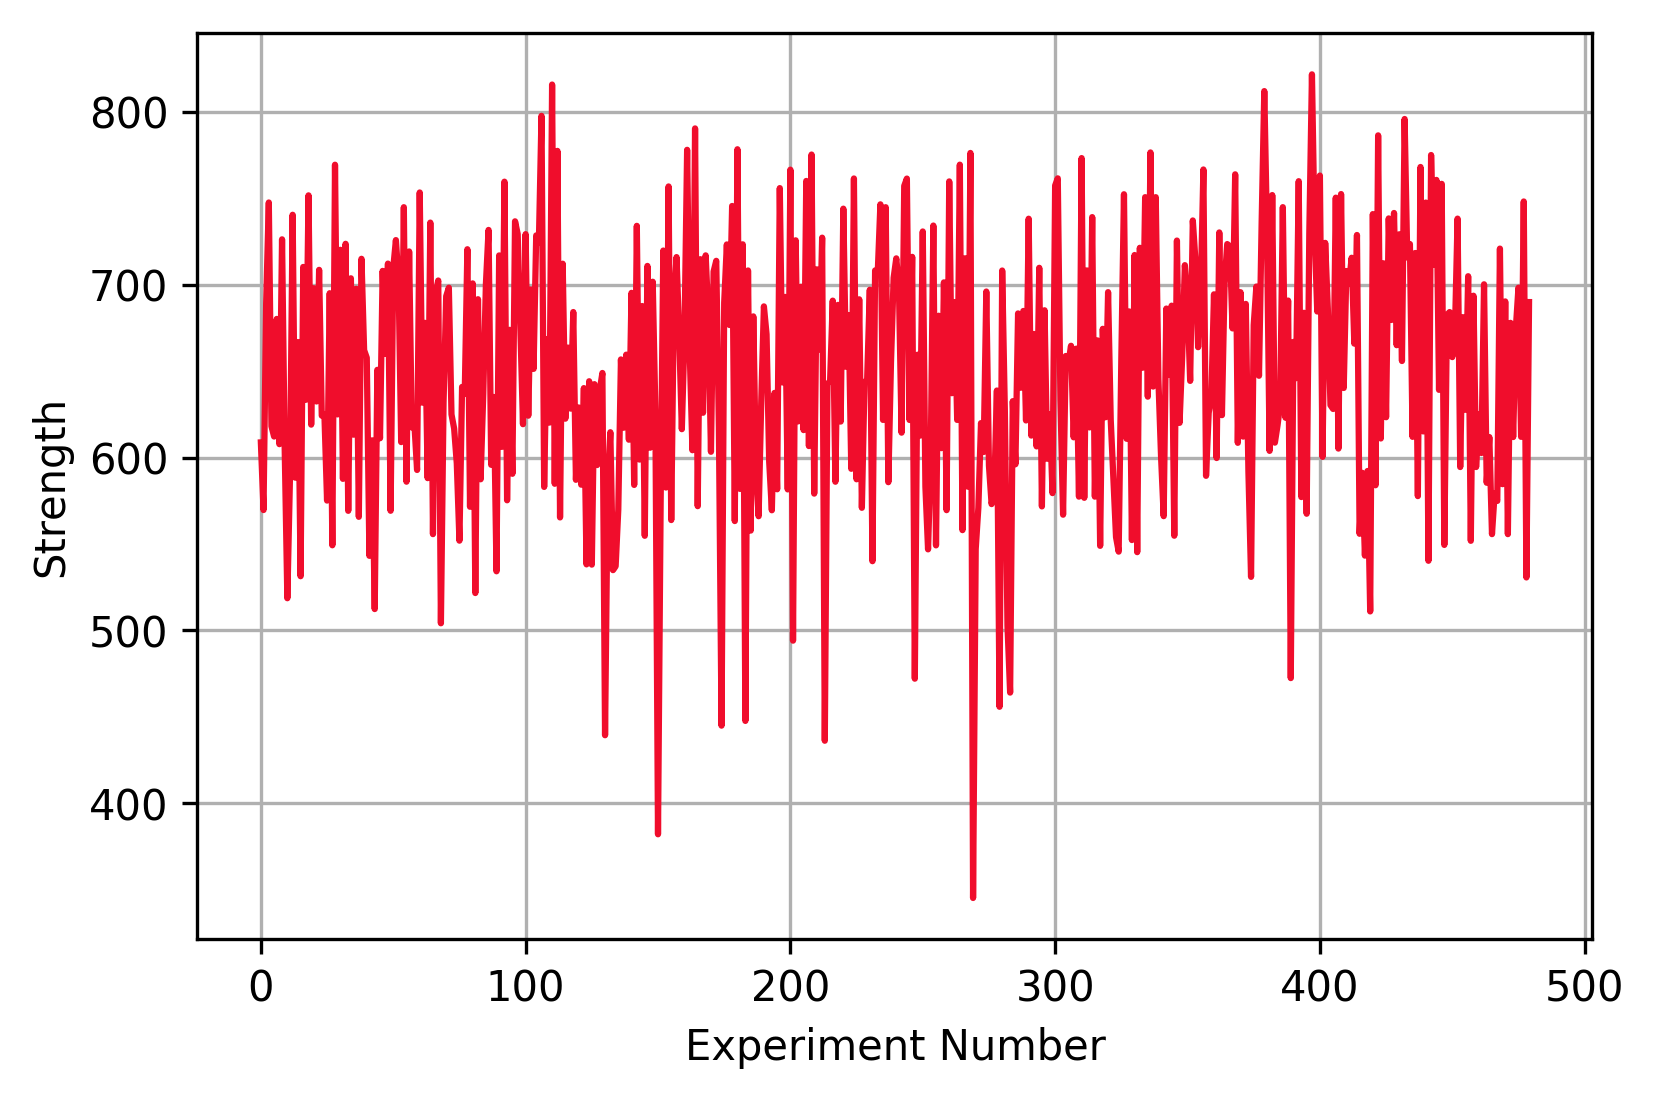

In [16]:
# Run Plot
plt.plot(Y)

# Add some grid lines
plt.grid()

# Add some labels
plt.xlabel('Experiment Number')
plt.ylabel('Strength')


### Histogram

Another easy plot is a histogram, which bins similar values of $Y$ observations, and plots a bar chart to show the frequency of similar $Y$ values in the data. To make a histogram, we can use the `plt.hist` function.

Documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

Text(0, 0.5, 'Frequency')

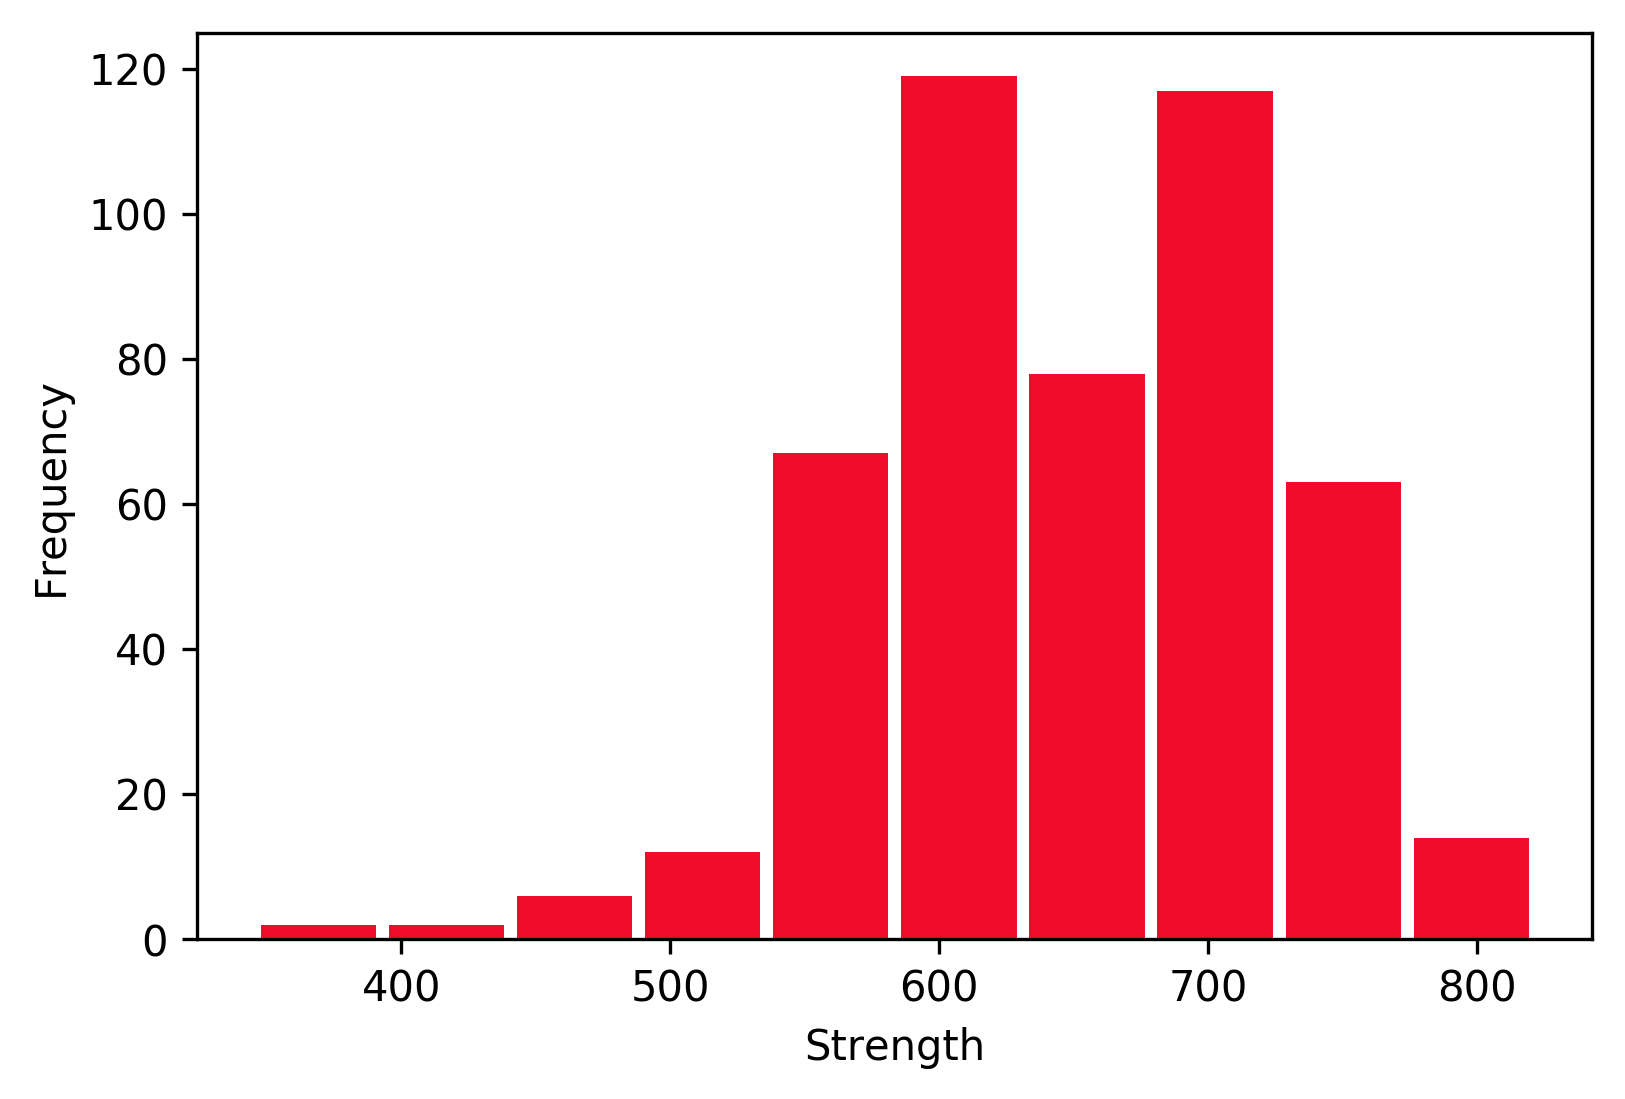

In [17]:
# Histogram plot
plt.hist(Y, rwidth=0.9)

# Labels
plt.xlabel('Strength')
plt.ylabel('Frequency')

### Box Plot

Another way of visualizing summary statistics is a box plot, which we can make using the `plt.boxplot` function.

Documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

Text(0, 0.5, 'Strength')

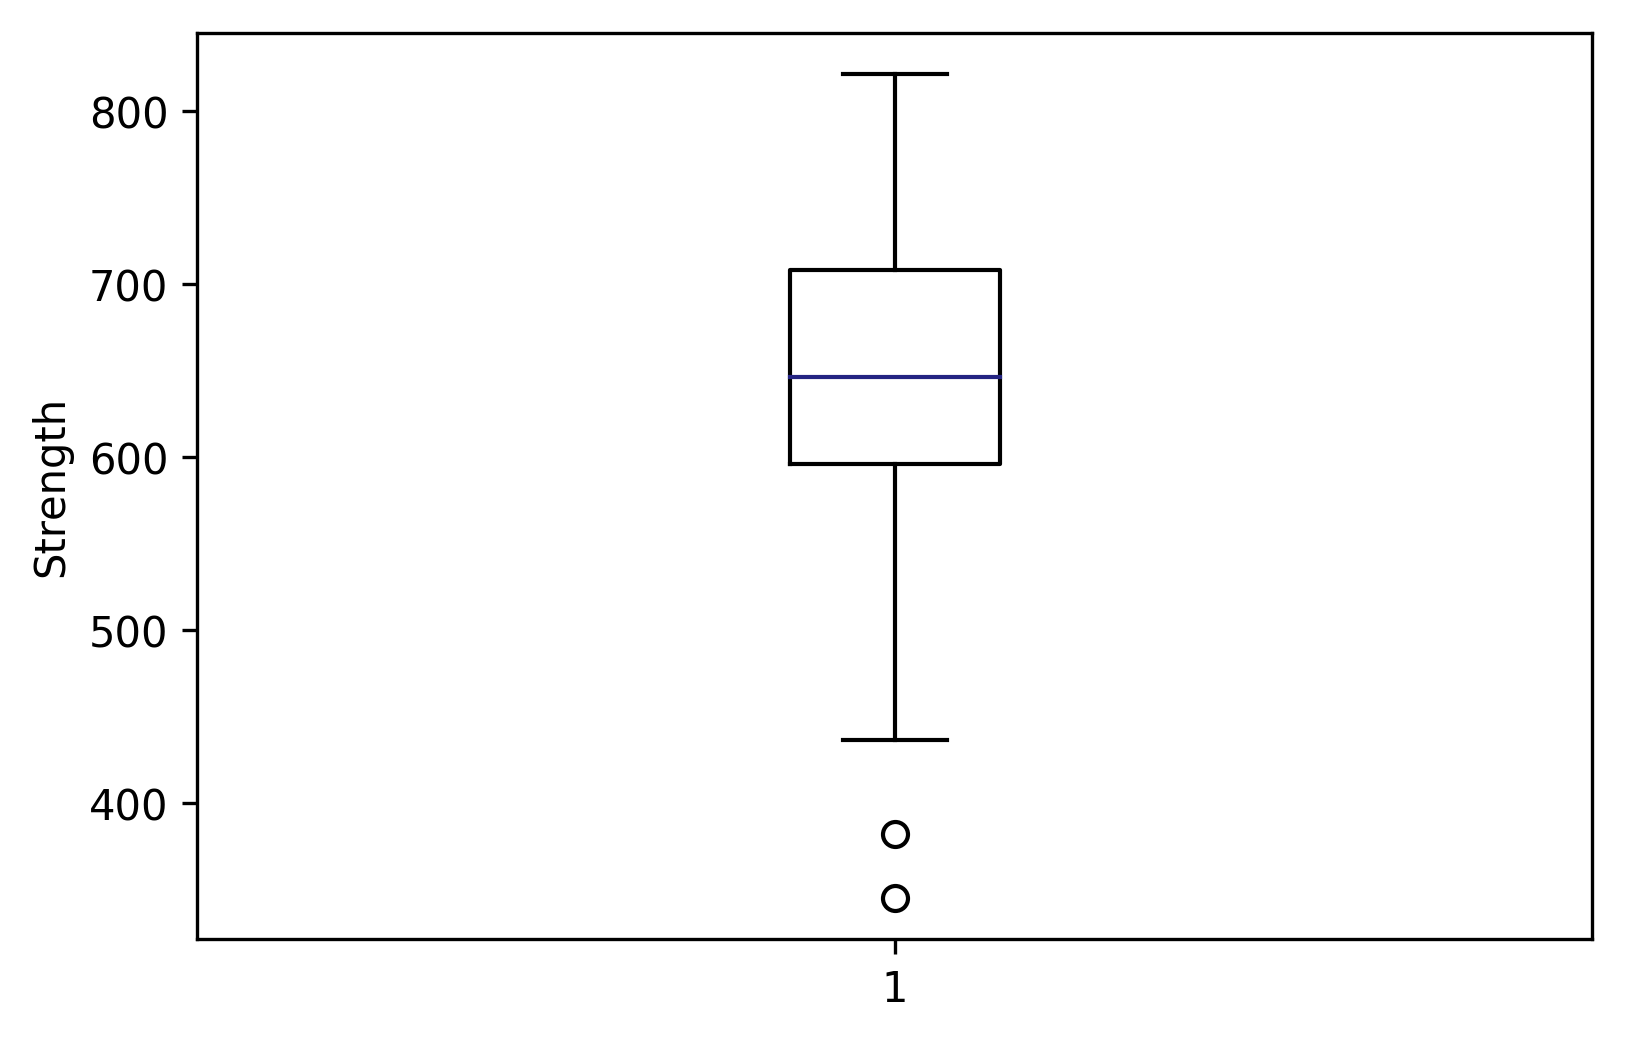

In [18]:
# Box plot
plt.boxplot(Y)

# Labels
plt.ylabel('Strength')

Here, the vertical axis correspond to $Y$ values. The purple line indicates the median value among the data. The rectangle shows the interval between 25% and 75% percentiles. That is, 50% of the data closest to the median is within this interval. The thin lines shows the maximum and minimum values of the $Y$ data, after removing outliers. The two dots are two outlier data points - points that are uncharacteristically small given the rest of the data.

Note that there are no large outliers - points that are uncharacteristically large.

### QQ Plots

Looking at the histogram of $Y$, we may think that the data looks like a bell curve. That is, we may think that the data has a **Normal (aka Gaussian)** distribution. We can visualize how well this appears using a **Quantile-Quantile (QQ) plot**.

To do this, we'll use another library called ``scipy``, and particular the function ``scipy.stats.probplot``, which is located in the sub-library ``scipy.stats``

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

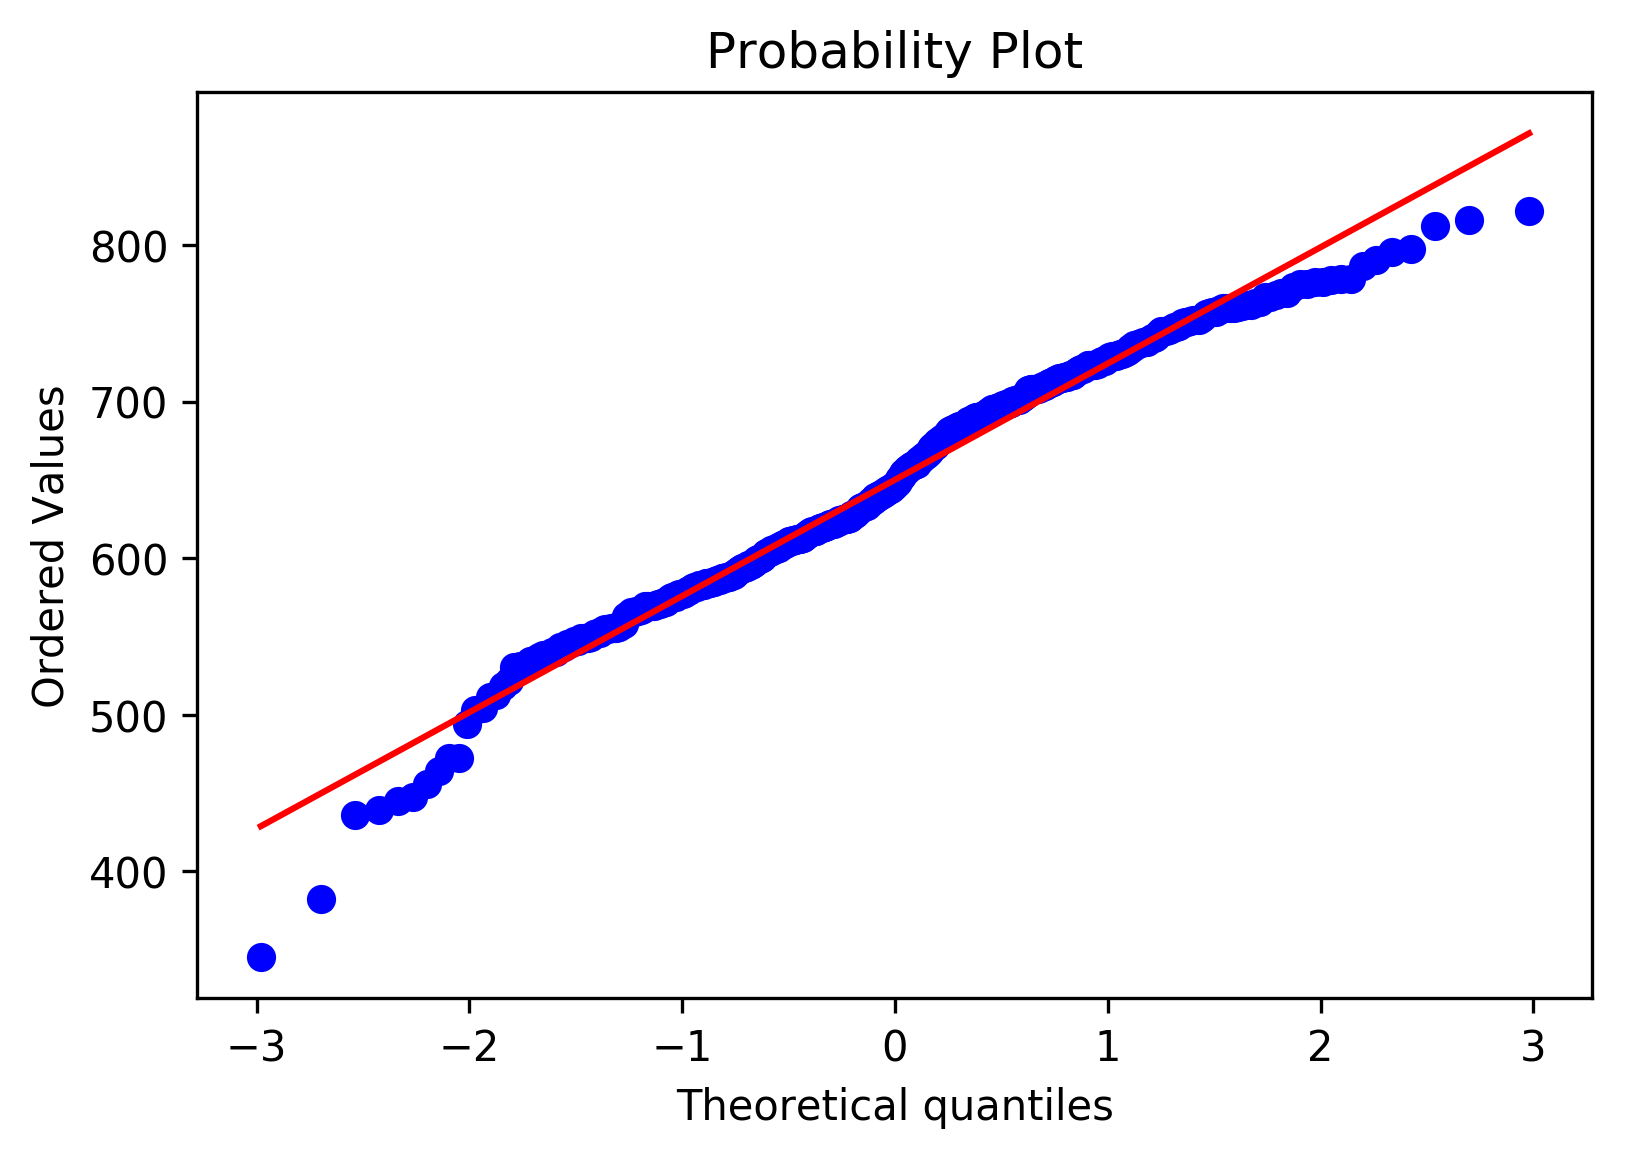

In [19]:
# Import the stats library. we won't give it an alias
from scipy import stats

# Use stats.probplot to make a QQ plot comared to the Normal/Gaussian Distribution
results = stats.probplot(Y, dist='norm', plot = plt)

If the observed distribution of the $Y$ data was really a Normal distribution, the blue dots and the red line would line up well. In fact, they do line up fairly well in the middle, but only deviate for large and small values of the observed data. This tells us that the tails (extreme values of $Y$) do not follow a normal distribution.

To see how this would look like for data that is actually coming from a normal distribution, we can generate normally distributed values below, and look at its QQ plot.

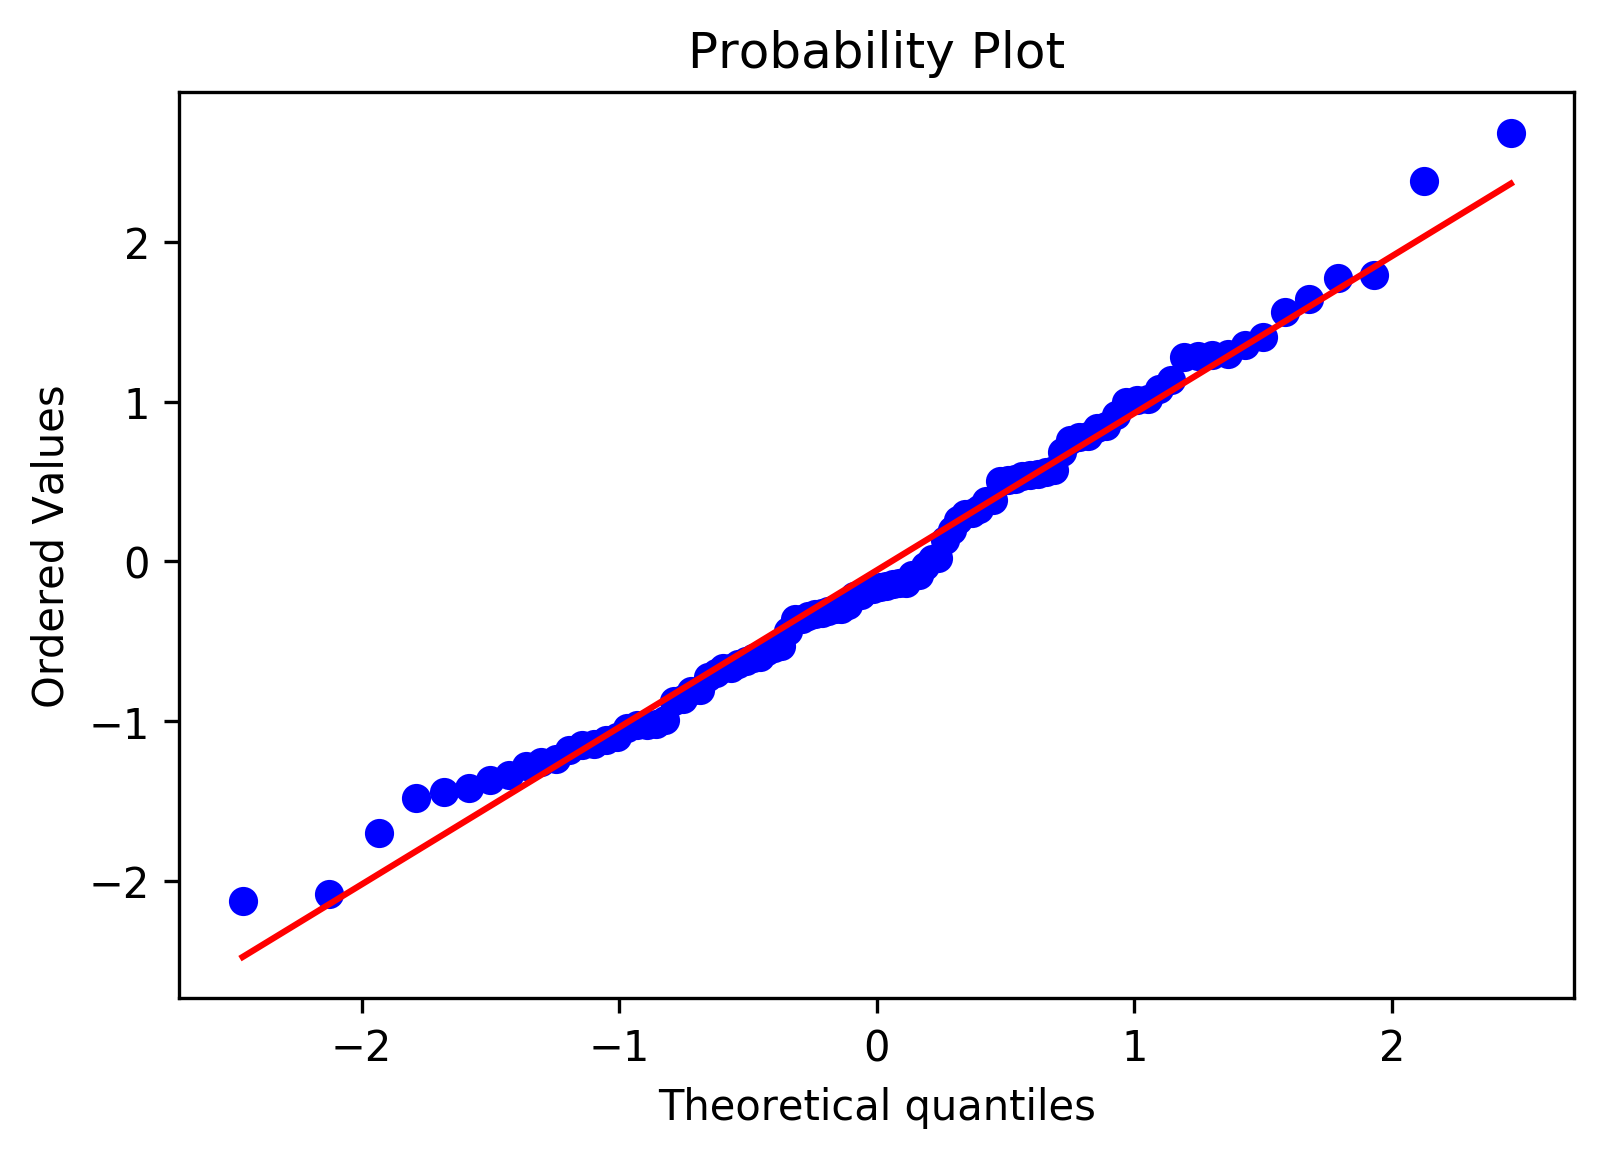

In [20]:
# Generate 50 observations of a N(0,1) random variable
Y_norm = np.random.normal(0, 1, 100)

# Make QQ Plot
results = stats.probplot(Y_norm, dist='norm', plot = plt)

To see an example of data that does not come from a normal distribution, we can generate data from a Uniform distribution, and compare it to the normal distribution using a QQ plot.

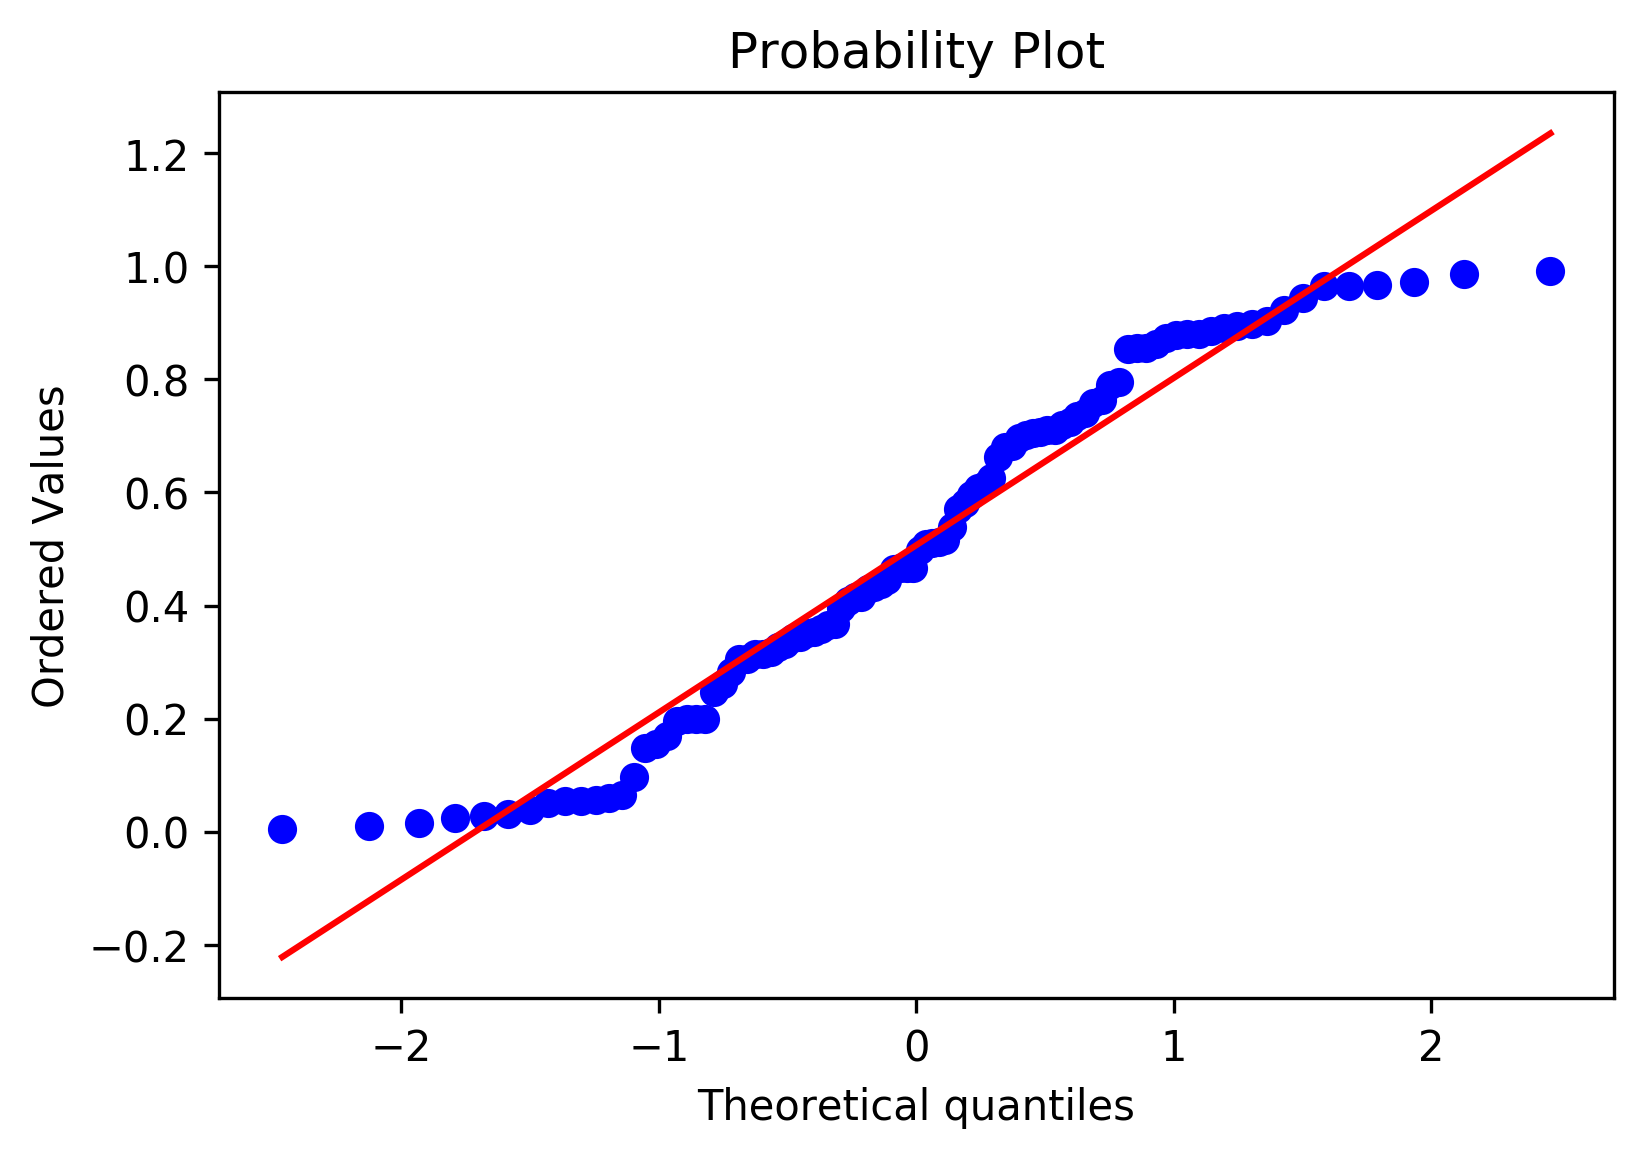

In [21]:
# Generate 50 observations of a Uniform random variable
Y_unif = np.random.uniform(0, 1, 100)

# Make QQ Plot
results = stats.probplot(Y_unif, dist='norm', plot = plt)

This is an example of something that is definitely not close to a normal distribution.

**Why do we care?**

As we'll see later on when we start getting into Machine Learning topics, we often must have a probabilistic model for our data. In fact, many basic results depend on a specific model (say a Gaussian Model) for our data. That means that we really need to know what kind of distribution our data is coming from, and the above QQ plots are one quick way of doing this visually.

Later on, we'll see how to do this with a bit more rigor and statistical precision using Hypothesis testing. But for now, in this first, exploratory stage, having these visual confirmations of our data model can be very helpful in deciding what further tests and analyses to perform.

## Effect of Batch on Response

Now we want to understand the effect of the other variables on the response variable. For example, we can ask how changing the Batch (column 13) affects ceramic strength. This is very typical in experimental materials, in which the response may change based on different batches that you must order from a supplier.

### Scatter Plot
One of the first things we can do is to plot $B$ vs $Y$ as a scatter plot. We can use the `plt.scatter` function.

Documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

Text(0, 0.5, 'Strength')

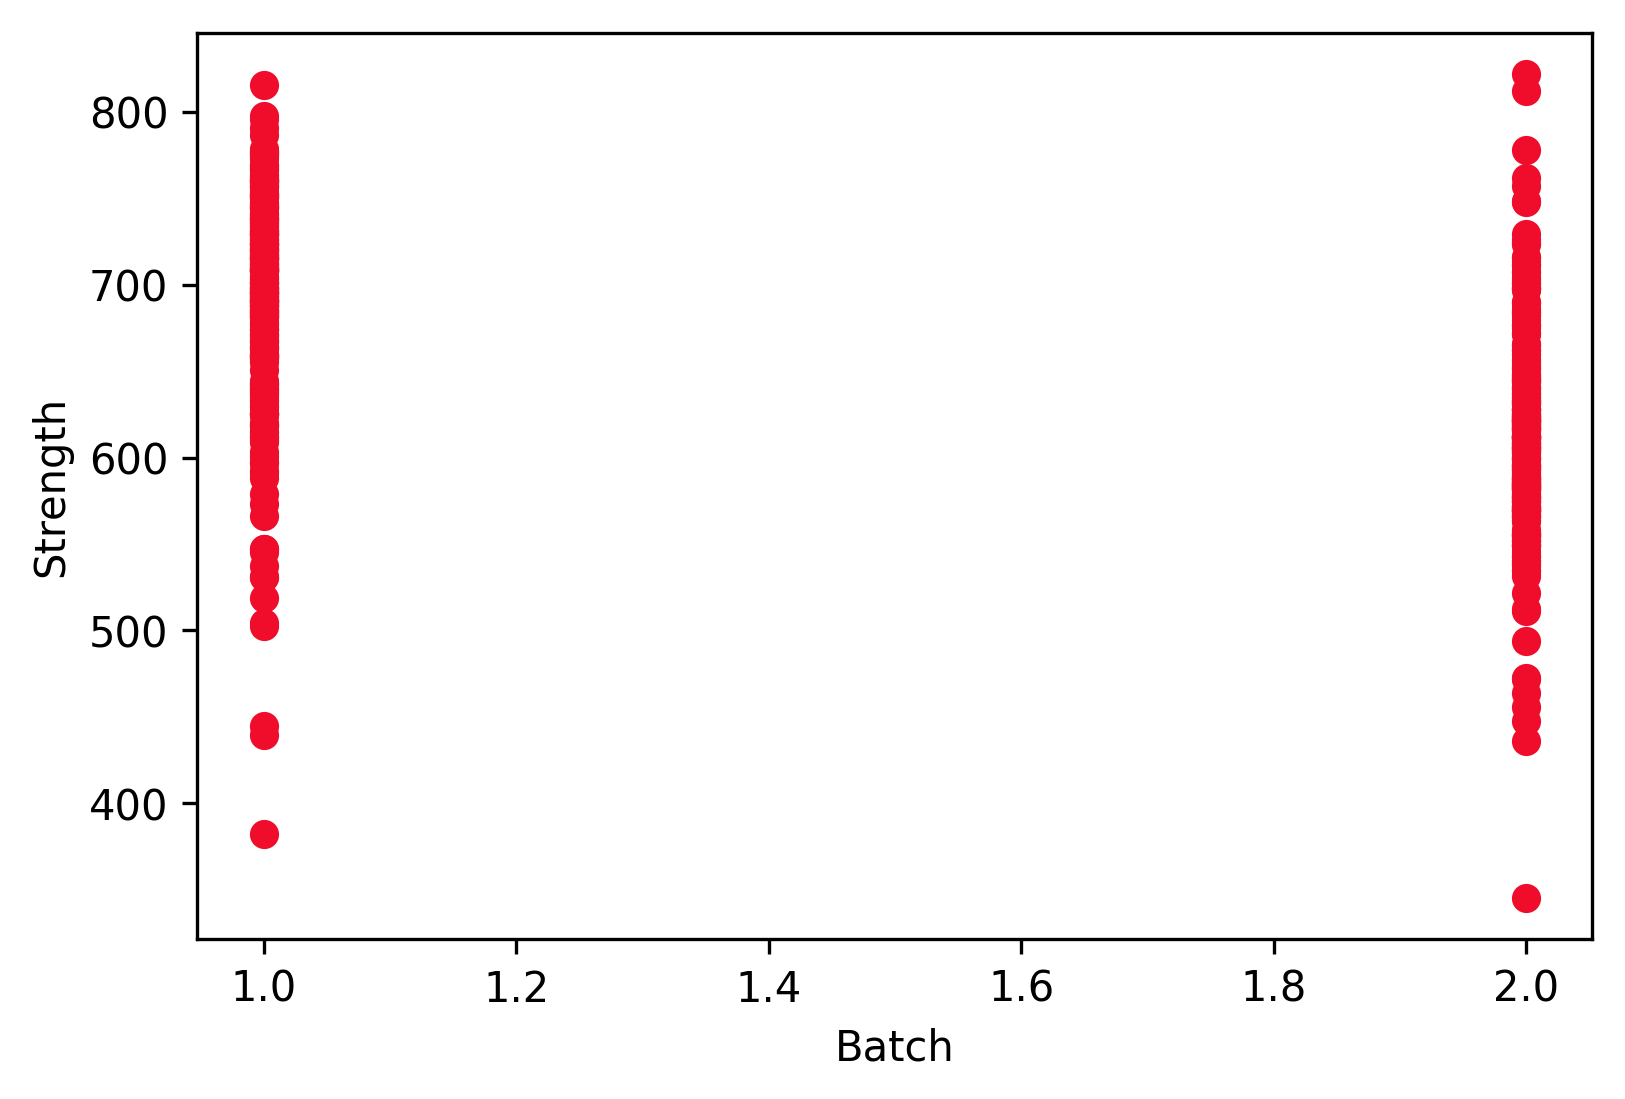

In [30]:
# define B 
B = data[:,13]

# Scatter plot B, Y using plt.scatter
plt.scatter(B, Y)

plt.xlabel('Batch')
plt.ylabel('Strength')

This plot really doesn't tell us much, except that we observe that there are only 2 values of the Batch variable, 1 and 2. The points overlap too much for us to say anything else more meaningful.

### Conditioning on Batch Number

Let's look at the response $Y$ for the first two batches. We'll write $Y | B = 1$ to indicate the $Y$ data values corresponding to the first batch and $Y | B = 2$ for the $Y$ values corresponding to the second batch.

Text(0, 0.5, 'Frequency')

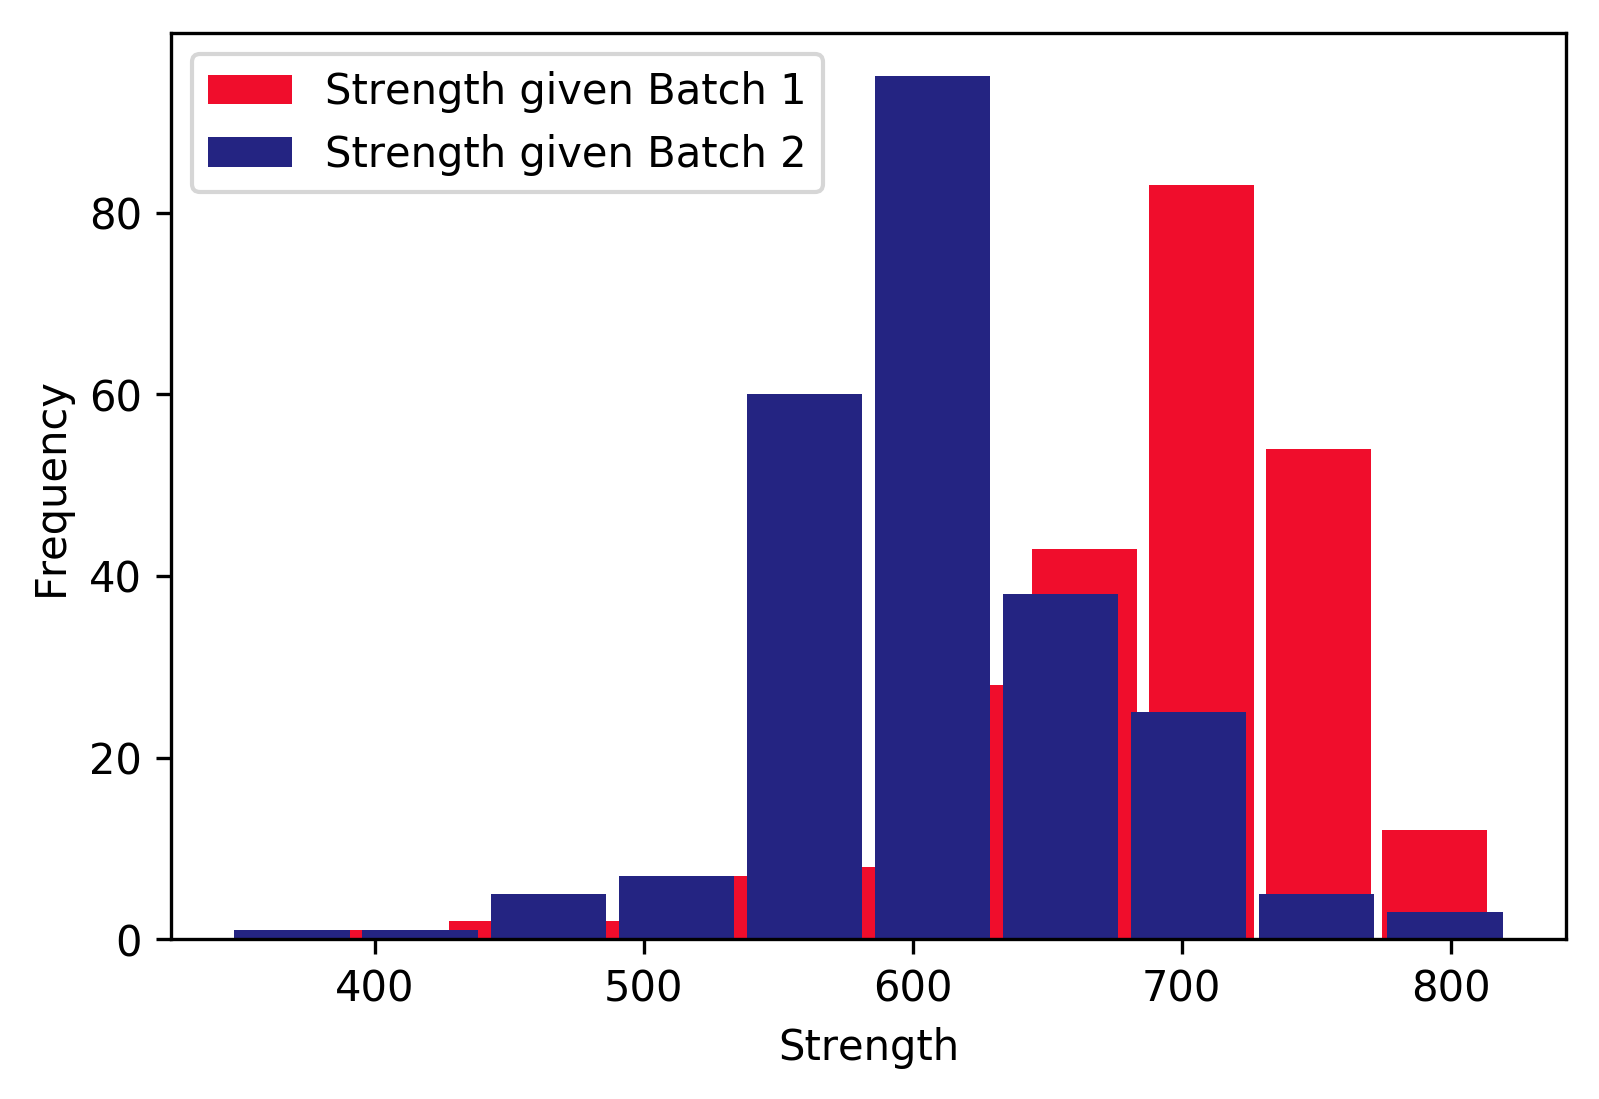

In [34]:
# Boolean indexing - This will be a 480-long array of True/False Values, True when Batch is 1, False otherwise.
I_B1 = (B == 1)

# Use the boolean index to extract the Y values corresponding to the cases when Batch is 1
Y_given_B1 = Y[I_B1]

# Do the same with Batch 2
Y_given_B2 = Y[B == 2]

# Plot histograms of both
plt.hist(Y_given_B1, rwidth = 0.9)
plt.hist(Y_given_B2, rwidth = 0.9)

# Add a legend
plt.legend(['Strength given Batch 1', 'Strength given Batch 2'])

# Add some labels
plt.xlabel('Strength')
plt.ylabel('Frequency')


We see that the two distributions for $Y|B=1$ and $Y|B=2$ are visually distinct, at least in where their mean or median values are. That is, the two distirbutions "peak" at different places. What about the spread, or standard deviation of the distributions? Are they similar?

### Summary statistics of conditional response

We see that the distributions are somewhat different. Let's compare their mean and standard deviations.

In [35]:
# Y|B=1 mean and std
mean_Y_given_B1 = np.mean(Y_given_B1)
std_Y_given_B1 = np.std(Y_given_B1)
print(mean_Y_given_B1)
print(std_Y_given_B1)


# Y|B=2 mean and std
mean_Y_given_B2 = np.mean(Y_given_B2)
std_Y_given_B2 = np.std(Y_given_B2)
print(mean_Y_given_B2)
print(std_Y_given_B2)

688.9986416666667
65.41238711300481
611.155975
61.72525099712198


**Questions**: 
* Are these two distributions significantly different? 
* That is, is there a strong batch effect on the response?
* How can you be sure of your answer?

**Question** We made histogram plots for the conditional responses $Y | B=1$ and $Y | B=2$. 
* Can you make the other types of plot for these conditional responses? 
* What do they tell you?

## Effect of Lab

This experiment was done across 8 different labs (Column 1). How different are the results from the different labs?

We'll again use conditioning to pick out the response function values specific to particular labs. Again, we will write

$$ Y | L = i $$

to describe the response function values obtained from lab $i$.

In [ ]:
# Define L
L = data[:,1]

# Define conditionals
Y_given_L1 = ???

# The same for all other labs (L = 2, 3, ..., 8)

# Make histograms



This was too much copy-and-pasting! Let's try to be a bit more programmatic by writing a ``for``-loop:

In [ ]:
# iterate over labs, i = 1, 2, ..., 8 (but not 9)
for i in range(1, 9):
    # Form boolean index to condition on L = i
    
    # condition Y | L = i 
    
    # plot histogram of the conditioned random variable
 
    

We get the same plot, but with less copy and pasting (imagine if we had 100 labs)!

But still, this is too much to look at! Let's try to instead summarize each histogram by  computing the mean of each of the conditional $Y$ values, and plotting the mean values for each lab, instead of the entire histogram.

In [ ]:
# allocate mean_values array to store the computed means of each conditionals
# one entry per lab (so 8 total)
mean_values_arr = np.zeros(8)

# loop over lab numbers
for i in range(1, 9):
    # Form boolean index to condition on L = i
    
    # condition Y | L = i 
    
    # calculate conditional mean and store it in the array
       
# plot the mean values with plt.plot (We could have also used "scatter" here)
plt.plot(mean_values_arr, linewidth=0, marker='o')
plt.xlabel('Lab number')
plt.ylabel('Mean Y conditioned on lab')

How does this variance between labs compare to the variance between batches?

**Question** We used the mean value summary statistic to simplify the plots for different labs. 
* What are other ways we can visualize the response value conditional on lab number?

For example, below is how to make several box plots, each corresponding to the distribution of $Y$ given a particular lab number

In [ ]:
# boxplot can take a Python list of data arrays. If given a list instead of 
# a single data array, boxplot will make several box plots, one for each
# array in the list

# declare the list that will hold data arrays
Y_vals_list = []

# loop over lab numbers
for i in range(1, 9):
    # Form boolean index to condition on L = i
    
    # condition Y | L = i 
    
    # add conditional values to list using the built-in `append`  function for Python lists
    Y_vals_list.append(Y_given_Li)
    
# plot box plot
plt.boxplot(Y_vals_list)
plt.xlabel("Lab number")
plt.ylabel("Y conditioned on lab")

## Multiple Conditioning

Did each lab handle the different batches the same? Maybe some labs were able to eliminate the batch effect. Let's try to compare the simultaneous effect of the batch and lab.

Now we want to look at response values obtain for a specific batch and a specific lab. For a batch i and lab j, we'll write

$$ Y |(B = i \text{ AND } L = j) $$

for the response values corresponding to both batch i and lab j. In Python, to combine two logical indices with an ``AND`` statement, we'll use the numpy function ``np.logical_and``.

In [ ]:
# define 2 dimensional array to store the mean values for response given batch and lab
# the 2D array will have 2 rows (one for each batch) and 8 columns (one for each lab)
mean_values_2d_arr = np.zeros([2,8])

# loop over batch number
for i in range(1, 3):
    # loop over lab number
    for j in range(1, 9):
        
        I_Bi = (B == (i))
        I_Lj = (L == (j))
     
        # find indices where batch is i AND lab is j
        I_Bi_Lj = np.logical_and(I_Bi, I_Lj)
        
        # Condintion Y on B=i and L=j
        Y_given_Bi_Lj = Y[I_Bi_Lj]        
      
        # calculate the conditional mean values
        # CAUTION: Use 0-based indexing to index into numpy arrays
        mean_values_2d_arr[i-1, j-1] = np.mean(Y_given_Bi_Lj)
        
               
# Now the first row of mean values corresponds to batch 1
# and the second row correspons to batch 2. Columns 
# correspond to different labs. Let's plot the values

# Plot the mean values of Y for different labs, given first batch
plt.plot(mean_values_2d_arr[0,:], linewidth=0, marker='o')

# Plot the mean values of Y for different labs, given second batch
plt.plot(mean_values_2d_arr[1,:], linewidth=0, marker='o')

# Add a legend for each of the 2 plots above
plt.legend(['Batch 1', 'Batch 2'])

plt.xlabel('Lab Number')
plt.ylabel('Y conditioned on Lab and Batch')

**Question** 
* What does this tell us about the batch effect? 
* Did any lab account for the batch effect?
* What is consistent between labs?

# Summary

In this lecture, we learned some ways to look at the data. We learned how to load the data into a numpy array called `data`. We also learned how to extract different rows and columns from the data. For example, to just get the column corresponding to the strength of the ceramic materials (column 4), we used the command `Y = data[:, 4]`.

We also learned how to use numpy to calculate summary statistics for an array of numerical data. Specifically, we saw how to calculate
* Mean values using `np.mean`
* Median values using `np.median`
* Standard deviation using `np.std`
* Maximum and minimum values using `np.max` and `np.min`

We also learned how to visualize the data with some plots using the `matplotlib.pyplot` and `scipy.stats` packages. Specifically, we saw how to make the following plots:

* Run plots (`plt.plot(Y)`)- which plots data values vs. row index.
* Histograms (`plt.hist(Y)`) - which shows the frequency of values among the data.
* Boxplots (`plt.boxplot(Y)` or `plt.boxplot(Y_list)`) - which shows one or several box plots, which are one dimensional representations of the data showing median values, the interval between 25% and 75% percentiles, outliers, and range of the data.
* QQ plots (`scipy.stats.probplot`) - which allows us to compare observed data to specific distributions, such as the Normal distribution.
* Scatter plots (`plt.scatter`) - which plots two variables against each other as $(x,y)$ pairs of points.

We lastly showed how to condition your data, that is pick subsets of your data ccording to some condition. For example, we wanted to get the $Y$ values that correspond to when the batch was equal to 1, which we wrote as $Y | B = 1$ and used the phrase "Y given B equal to 1". To do this in python, we used Boolean indexing which was done in two steps.

* Define an array of True/False values in which the "True" values correspond to the data we want to extract. For example, we made such an *index array* `I_B1 = (B == 1)` to be True when the batch equaled 1, and False otherwise.
* Use the index array to extract the proper subset from the response array $Y$ using `Y_given_B1 = Y[I_B1]`.

We used this to perform a similar analysis on subsets of the $Y$ data corresponding to specific batches or specific labs. We then compared the results of this analysis between batches and labs to see if these had a significant effect on the statistics of $Y$.
